<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce
from collections import defaultdict

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'scanner_data.csv',
 'mock_sales_data.csv',
 '1_customers_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'bz_data_analyis.csv',
 'groceries.csv',
 '1_order_payments_dataset.csv',
 'sales_data_with_stores.csv',
 'match_result_test.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'sales.csv',
 'online_retail.xlsx',
 'app_wau.csv',
 'online_retail_II.xlsx',
 'sample-sales-data.csv',
 'test.csv',
 'ab_experiment.csv',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [5]:
df = pd.read_csv('app_wau.csv')
df.occurred_at = pd.to_datetime(df.occurred_at)
df['date'] = df.occurred_at.to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['weekday'] = df['week'].dt.weekday
df.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,0


In [20]:
list_weekday = dict(zip(range(7), ['mon','tue','wed','thu','fri','sat','sun']))
df['weekday'] = df['weekday'].apply(lambda x : list_weekday.get(x,x))
#df['weekday'] = df['weekday'].astype('category').cat.reorder_categories([a for a in list_weekday.values()])
df.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,mon
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,mon
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,mon
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,mon
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,mon


In [22]:
temp_df = df[(df['event_name'] == 'login') & (df['location'] == 'United States')]
temp_df.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
58,11194.0,2014-05-06 16:17:58,engagement,login,United States,ipad mini,2.0,2014-05-06,2014-05-05,mon
89,11231.0,2014-05-07 18:21:30,engagement,login,United States,lenovo thinkpad,1.0,2014-05-07,2014-05-05,mon
123,11284.0,2014-05-08 17:02:51,engagement,login,United States,macbook air,1.0,2014-05-08,2014-05-05,mon
196,11464.0,2014-05-01 16:42:05,engagement,login,United States,samsung galaxy s4,2.0,2014-05-01,2014-04-28,mon
244,11578.0,2014-05-06 11:38:47,engagement,login,United States,macbook air,2.0,2014-05-06,2014-05-05,mon


In [37]:
cnt_us = temp_df[['user_id', 'date', 'device', 'user_type']].drop_duplicates()
cnt_us = cnt_us.groupby(['date','user_type'])['user_id'].count().reset_index().rename(columns = {'user_id':'au'})
cnt_us['ratio'] = cnt_us.groupby(['date'])['au'].apply(lambda x : round(x/max(x)*100,2))
cnt_us.head()

,date,user_type,au,ratio
0,2014-05-01,1.0,46,100.00
1,2014-05-01,2.0,18,39.13
2,2014-05-01,3.0,27,58.70
3,2014-05-02,1.0,58,100.00
4,2014-05-02,2.0,20,34.48


In [41]:
cnt_us['roll_d7'] = cnt_us['ratio'].rolling(7).mean()
cnt_us.head()

,date,user_type,au,ratio,roll_d7
0,2014-05-01,1.0,46,100.00,NaN
1,2014-05-01,2.0,18,39.13,NaN
2,2014-05-01,3.0,27,58.70,NaN
3,2014-05-02,1.0,58,100.00,NaN
4,2014-05-02,2.0,20,34.48,NaN


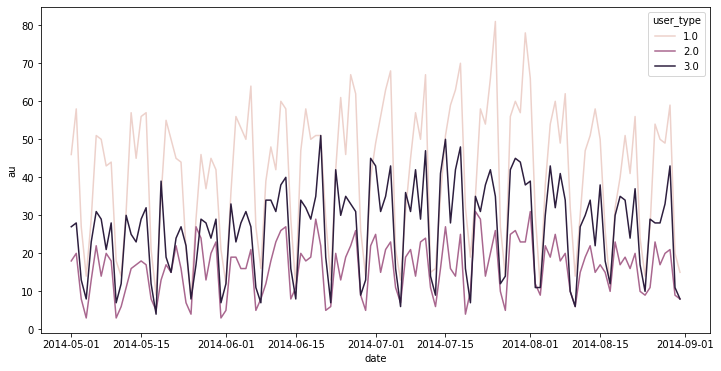

In [30]:
plt.figure(figsize = (12,6))
sns.lineplot(data = cnt_us, x = 'date', y = 'au', hue = 'user_type')

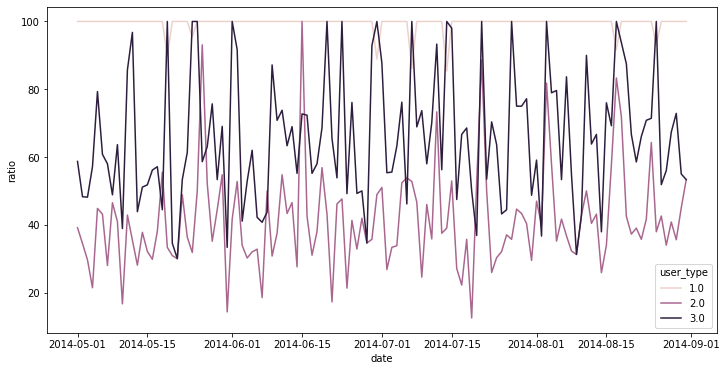

In [38]:
plt.figure(figsize = (12,6))
sns.lineplot(data = cnt_us, x = 'date', y = 'ratio', hue = 'user_type')

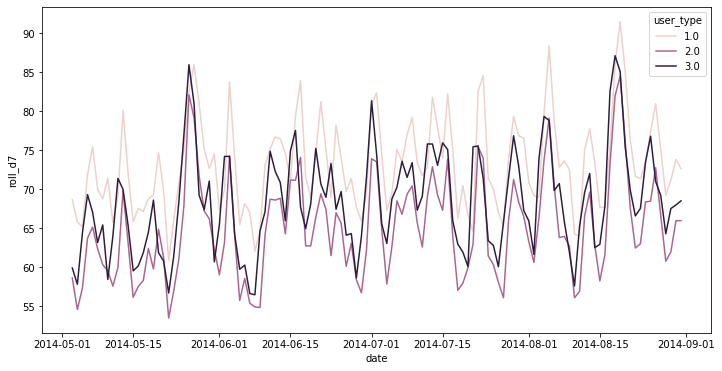

In [42]:
plt.figure(figsize = (12,6))
sns.lineplot(data = cnt_us, x = 'date', y = 'roll_d7', hue = 'user_type')

# Iterators

In [43]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [44]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}